In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [3]:
! pip install --upgrade pip
! pip install 'dask[complete]'
! pip install auto-ts
! pip install pmdarima
! pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached distributed-2022.2.0-py3-none-any.whl (837 kB)
  Attempting uninstall: distributed
    Found existing installation: distributed 2.30.1
    Uninstalling distributed-2.30.1:
      Successfully uninstalled distributed-2.30.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Reading  shampoo sales 

In [5]:
data = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')#, index_col=0, parse_dates=True)
data['Month'].values

array(['1-Jan', '1-Feb', '1-Mar', '1-Apr', '1-May', '1-Jun', '1-Jul',
       '1-Aug', '1-Sep', '1-Oct', '1-Nov', '1-Dec', '2-Jan', '2-Feb',
       '2-Mar', '2-Apr', '2-May', '2-Jun', '2-Jul', '2-Aug', '2-Sep',
       '2-Oct', '2-Nov', '2-Dec', '3-Jan', '3-Feb', '3-Mar', '3-Apr',
       '3-May', '3-Jun', '3-Jul', '3-Aug', '3-Sep', '3-Oct', '3-Nov',
       '3-Dec'], dtype=object)

### Converting month column in standard date parseable format

In [6]:
data['Month'] = '200' + data['Month']

months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
       'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 }

dates = []
for i in data['Month']:
    dates.append(i.split("-")[0]+"-"+str(months[i.split("-")[1]]))

In [7]:
data['dates'] = pd.to_datetime(dates)
data = data.drop(columns = 'Month')
data = data.set_index('dates', drop=True)
data

,Sales of shampoo over a three year period
dates,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


### Checking for null values

In [8]:
data.isna().sum()

Sales of shampoo over a three year period    0
dtype: int64

### Plotting shampoo dataset

In [9]:
import plotly.express as px

ss3 = 'Sales of shampoo over a three year period'

fig = px.line(data,x=data.index, y=ss3, title='Shampoo Sales in last 3 years')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

### Performing ADF test to check whether the time series is staionary or not

In [10]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
out = adfuller(data[ss3])
print('ADF Statistic: {}'.format(out[0]))
print('p-value: {}'.format(out[1]))

ADF Statistic: 3.0601420836411797
p-value: 1.0


### Plotting trend, seasonal and residual graphs

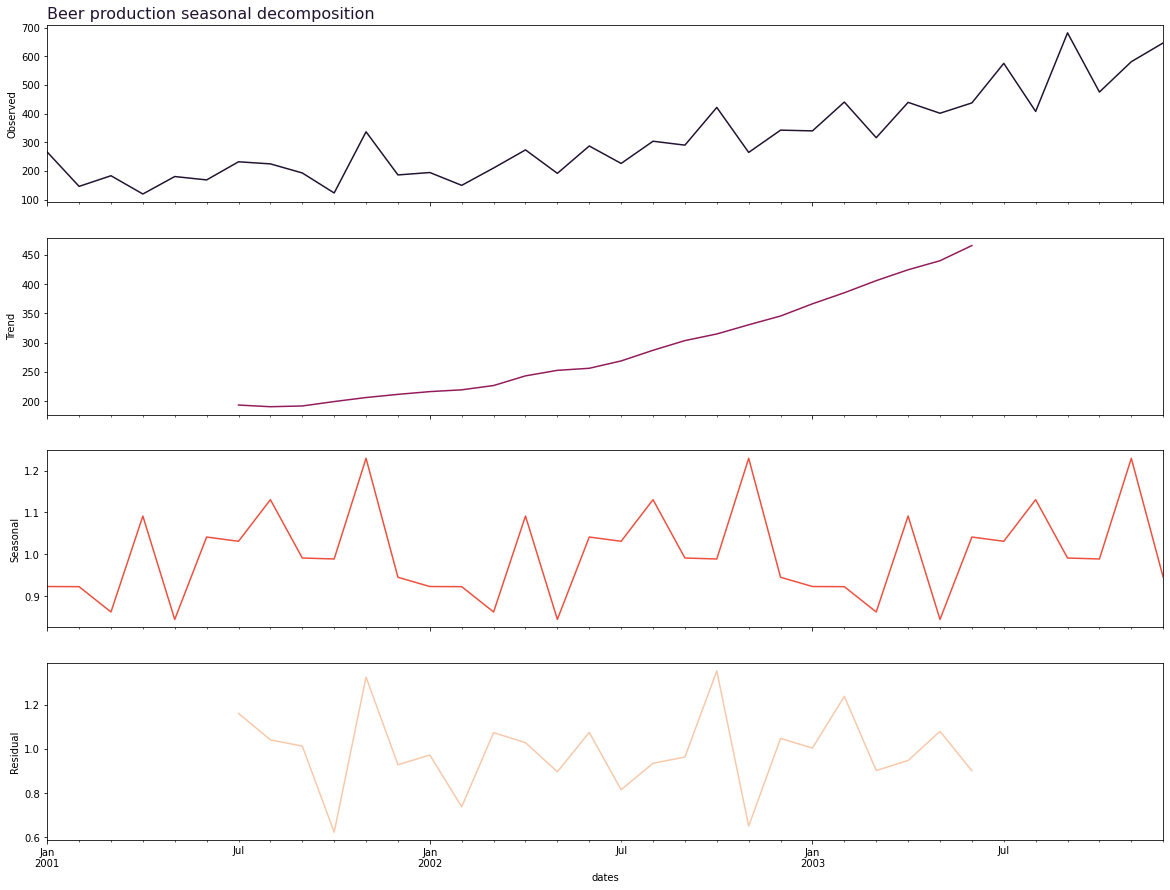

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(x=data[ss3], model='multiplicative')
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20,15))

# sd = seasonal_decompose(x=data['Monthly beer production'], model='additive')
# fig, axes = plt.subplots(4, 1, sharex=True, figsize=(18,9))

colours = sb.color_palette('rocket', 10)

sd.observed.plot(ax=axes[0], legend=False, color=colours[0])
axes[0].set_ylabel('Observed')
sd.trend.plot(ax=axes[1], legend=False, color=colours[3])
axes[1].set_ylabel('Trend')
sd.seasonal.plot(ax=axes[2], legend=False, color=colours[6])
axes[2].set_ylabel('Seasonal')
sd.resid.plot(ax=axes[3], legend=False, color=colours[9])
axes[3].set_ylabel('Residual')
axes[0].set_title('Beer production seasonal decomposition', loc='left', fontsize=16, color=colours[0])
plt.show()

### Plotting pacf and acf to estimate p and q values for AR and MA respectively

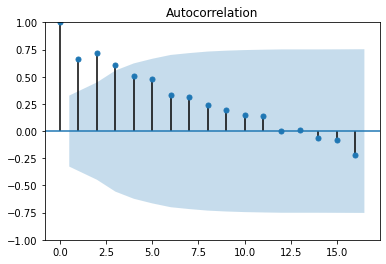

In [12]:
plot_acf(data)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



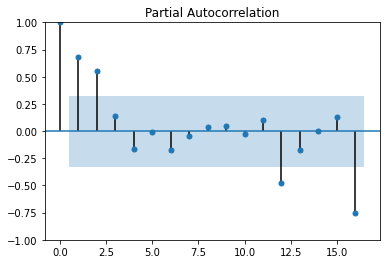

In [13]:
plot_pacf(data)
plt.show()

### Best p = 2, q = 2

### Splitting the data into train and test splits

In [14]:
train_set = data[:'2003-01']
test_set = data['2003-01':]
test_set

,Sales of shampoo over a three year period
dates,
2003-01-01,339.7
2003-02-01,440.4
2003-03-01,315.9
2003-04-01,439.3
2003-05-01,401.3
2003-06-01,437.4
2003-07-01,575.5
2003-08-01,407.6
2003-09-01,682.0


In [15]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Using Auto ARIMA to get the coefficients for SARIMAX with the lowest BIC score

In [16]:
import pmdarima as pm

model = pm.auto_arima(train_set, m = 12, seasonal = True, start_p = 0, 
                      start_q = 0, max_order = 5, test = 'adf', information_criterion='bic',
                      error_action = 'ignore', suppress_warnings = True,
                      stepwise = True, trace = True)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : BIC=288.820, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=289.315, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : BIC=277.094, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : BIC=286.166, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : BIC=279.019, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : BIC=280.259, Time=0.35 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : BIC=280.259, Time=0.31 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : BIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : BIC=283.437, Time=0.25 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : BIC=285.642, Time=0.08 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : BIC=279.132, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : BIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : BIC=inf, Time=0.15 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : BIC=inf, T

In [17]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   25
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -132.756
Date:                            Tue, 14 Jun 2022   AIC                            271.512
Time:                                    16:41:14   BIC                            275.046
Sample:                                         0   HQIC                           272.450
                                             - 25                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6490      0.231     -2.804      0.005      -1.103      -0.195
ar.S.L12      -0.5547      0.274   

### Forecasting shampoo sales for test period

In [18]:
forecast = model.predict(n_periods = test_set.shape[0], return_conf_int= True)

In [19]:
forecast_df = pd.DataFrame(data = forecast[0], index = test_set.index, columns = ['Prediction'])
confidence_df = pd.DataFrame(data = forecast[1], index = test_set.index, columns = ['Confidence_lo','Confidence_up'])

In [20]:
f = pd.concat([data,forecast_df,confidence_df], axis = 1)

In [21]:
import plotly.express as px

fig = px.line(f,x=f.index, y=[ss3,'Prediction'], title='Beer prediction data')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

### Using best coefficients from Auto ARIMA model for rolling forecast prediction

In [22]:
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

rolling_predictions = test_set.copy()
for train_end in test_set.index:
    train_data = data[:train_end-timedelta(days=1)]
    model=SARIMAX(train_data,order=(1, 1, 1),seasonal_order=(1,0,0,12))
    results=model.fit()
    pred = results.forecast()
    # print(pred.values,train_end)
    rolling_predictions[train_end] = pred



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infer

In [23]:

r_p_d = pd.Series(np.diag(rolling_predictions.drop(ss3, axis = 1)), index = test_set.index)

pred2 = results.get_forecast('2004-12-01')
pred2_ci = pred2.conf_int()
pred_mean = pred2.predicted_mean['2003-12-01':'2004-12-01']

fore_df = pd.DataFrame(data = r_p_d, index = test_set.index, columns = ['Prediction'])
rf = pd.concat([data,fore_df,pred_mean], axis = 1)

In [24]:
fore_df = pd.DataFrame(data = r_p_d, index = test_set.index, columns = ['Prediction'])
rf = pd.concat([data,fore_df,pred_mean], axis = 1)
rf

,Sales of shampoo over a three year period,Prediction,predicted_mean
2001-01-01,266.0,NaN,NaN
2001-02-01,145.9,NaN,NaN
2001-03-01,183.1,NaN,NaN
2001-04-01,119.3,NaN,NaN
2001-05-01,180.3,NaN,NaN
2001-06-01,168.5,NaN,NaN
2001-07-01,231.8,NaN,NaN
2001-08-01,224.5,NaN,NaN
2001-09-01,192.8,NaN,NaN
2001-10-01,122.9,NaN,NaN


In [25]:
fig = px.line(rf,x=rf.index, y=[ss3,'Prediction','predicted_mean'], title='Beer prediction data')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

### Trying p and q values for possibility of better results

In [26]:
from datetime import timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

rolling_predictions = test_set.copy()
for train_end in test_set.index:
    train_data = data[:train_end-timedelta(days=1)]
    model=SARIMAX(train_data,order=(2, 1, 2),seasonal_order=(1,0,0,12))
    results=model.fit()
    pred = results.forecast()
    # print(pred.values,train_end)
    rolling_predictions[train_end] = pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check m

In [27]:
r_p_d = pd.Series(np.diag(rolling_predictions.drop(ss3, axis = 1)), index = test_set.index)

pred2 = results.get_forecast('2004-12-01')
pred2_ci = pred2.conf_int()
pred_mean = pred2.predicted_mean['2003-12-01':'2004-12-01']

fore_df = pd.DataFrame(data = r_p_d, index = test_set.index, columns = ['Prediction'])
rf = pd.concat([data,fore_df,pred_mean], axis = 1)

In [28]:
fig = px.line(rf,x=rf.index, y=[ss3,'Prediction','predicted_mean'], title='Beer prediction data')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

### Using auto time series in hopes to get a better model

In [33]:
train_set['Month'] = train_set.index

In [29]:
from auto_ts import auto_timeseries

model = auto_timeseries(forecast_period=12,
                        score_type='rmse', time_interval='M',
                        model_type='best',seasonality = True)

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



Start of Fit.....
    Target variable given as = Sales of shampoo over a three year period
Start of loading of data.....
    Inputs: ts_column = Month, sep = ,, target = ['Sales of shampoo over a three year period']
    Using given input: pandas dataframe...
    Month column exists in given train data...
    train data shape = (25, 1)
Alert: Could not detect strf_time_format of Month. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophe

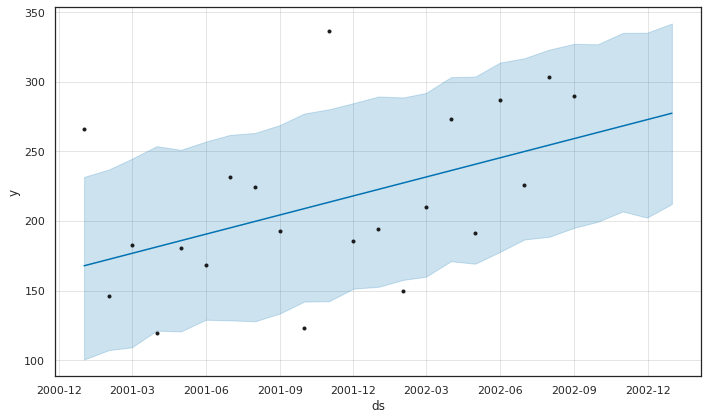

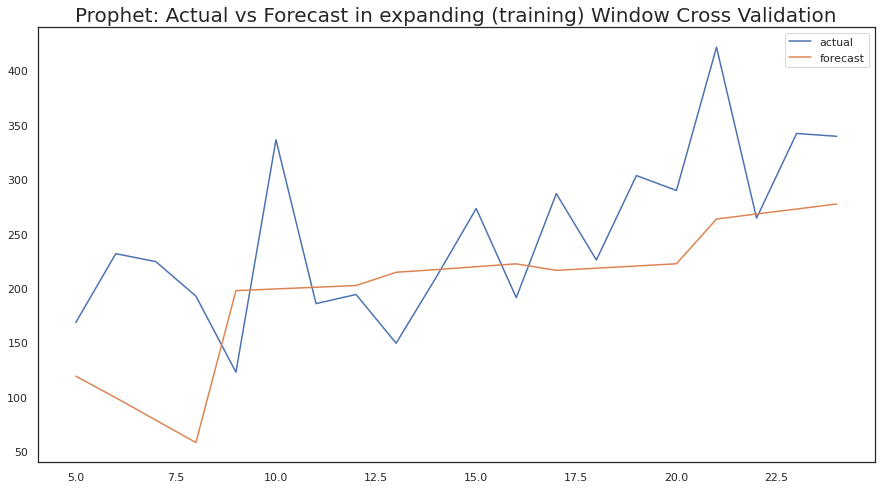

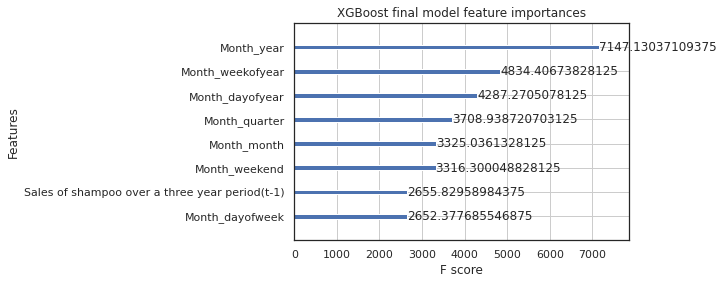

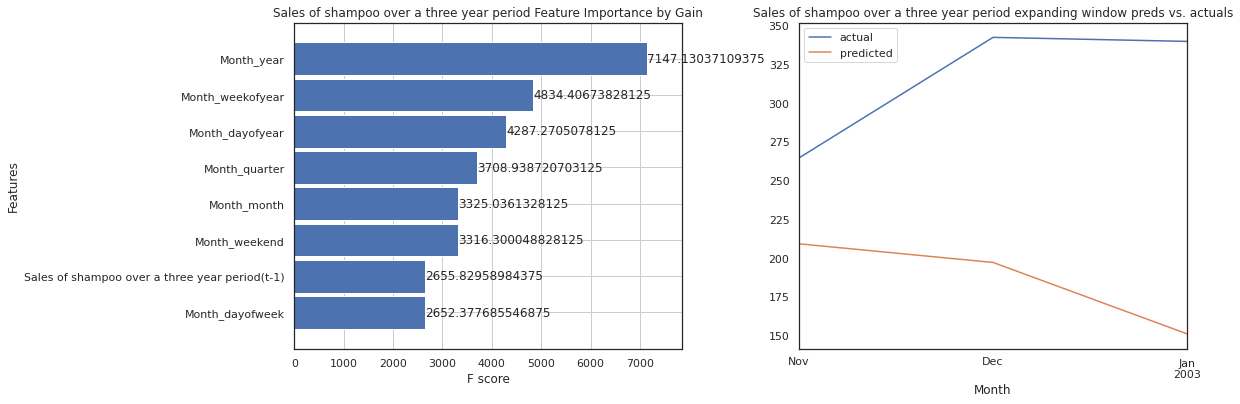

In [34]:
model.fit(traindata= train_set, 
          ts_column="Month",
          target=ss3)